In [10]:
# import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
# filter future warnings for privacy matters
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
# function to output the model
def output_markovitz_model(tickers, data, portfolio_type):
    # MuliIndex fix --> new update of yfinance
    returns = data.pct_change().dropna()    # daily returns
    mean_returns = returns.mean() * 252     # mean annual returns
    cov_matrix = returns.cov() * 252        # annual covariance matrix
    correlation_matrix = returns.corr()     # annual correlation matrix
    num_portfolios = 10000                  # num of simulations

    # prepare arrays for results
    results = np.zeros((3, num_portfolios))
    weights_record = []

    # simulations or random portfolios
    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        weights_record.append(weights)

        # calculate sharp ratio and risk
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # save results
        results[0, i] = portfolio_return
        results[1, i] = portfolio_stddev
        results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

    # convert results in DF (DataFrame)
    results_df = pd.DataFrame({
        'Return': results[0],
        'Risk': results[1],
        'Sharpe Ratio': results[2]
    })

    # max return and min risk
    max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
    max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
    min_risk_idx = results_df['Risk'].idxmin()
    min_risk_portfolio = results_df.loc[min_risk_idx]

    # graph plot
    plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
    plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
    plt.title(f'Frontiera efficiente ({portfolio_type})')
    plt.xlabel('Rischio')
    plt.ylabel('Rendimento atteso')
    plt.legend()
    plt.show()

    # correlation matrix
    plt.figure()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matrice di correlazione ({portfolio_type})')
    plt.show()

    # print details of optimized portfolios
    print("Portafoglio con massimo Sharpe Ratio:")
    print(f" Rendimento atteso: {max_sharpe_portfolio['Return']:.2%}")
    print(f" Rischio: {max_sharpe_portfolio['Risk']:.2%}")
    print("\nPortafoglio con rischio minimo:")
    print(f" Rendimento atteso: {min_risk_portfolio['Return']:.2%}")
    print(f" Rischio: {min_risk_portfolio['Risk']:.2%}")

    # portfolio sharpe ratio
    risk_free = 0.02        # 2% per year
    max_sharpe_ratio = (0.4090 - risk_free) / 0.233     
    min_sharpe_ratio = (0.1827 - risk_free) / 0.16

    print(f"\nSharpe Portfolio Max Sharpe: {max_sharpe_ratio:.2f}")
    print(f"Sharpe Portfolio Min Risk: {min_sharpe_ratio:.2f}")

[*********************100%***********************]  5 of 5 completed


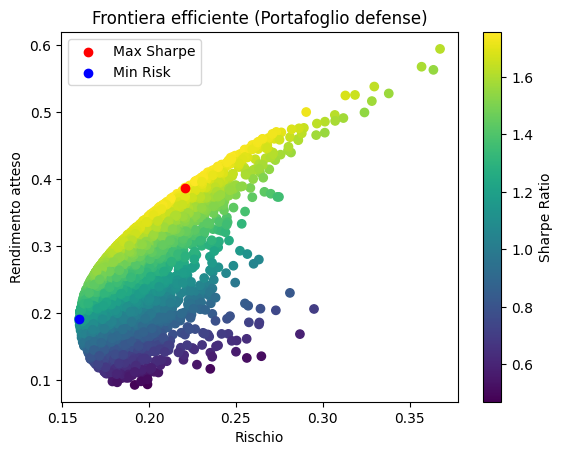

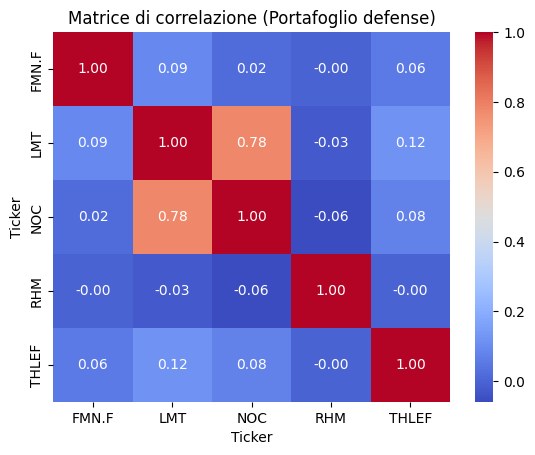

Portafoglio con massimo Sharpe Ratio:
 Rendimento atteso: 38.76%
 Rischio: 22.07%

Portafoglio con rischio minimo:
 Rendimento atteso: 19.19%
 Rischio: 15.99%

Sharpe Portfolio Max Sharpe: 1.67
Sharpe Portfolio Min Risk: 1.02


In [ ]:
# defense portfolio
defense_portfolio_tickers = ['LMT', 'RHM', 'NOC', 'THLEF', 'FMN.F']
# download adjusted data for each ticker
defense_portfolio_data = yf.download(defense_portfolio_tickers, start='2022-02-24', end='2025-02-24')['Close']
defense_portfolio = 'Portafoglio defense'

output_markovitz_model(defense_portfolio_tickers, defense_portfolio_data, defense_portfolio)

[*********************100%***********************]  5 of 5 completed


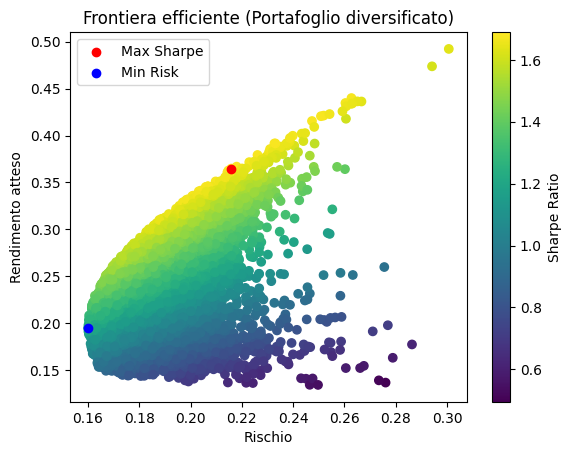

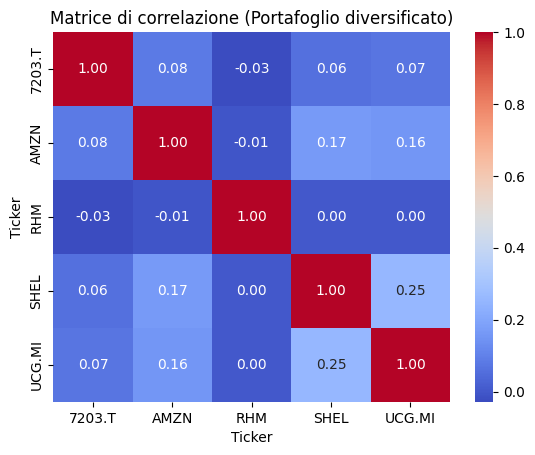

Portafoglio con massimo Sharpe Ratio:
 Rendimento atteso: 36.48%
 Rischio: 21.59%

Portafoglio con rischio minimo:
 Rendimento atteso: 19.49%
 Rischio: 16.01%

Sharpe Portfolio Max Sharpe: 1.67
Sharpe Portfolio Min Risk: 1.02


In [14]:
# diversified portfolio
diversified_portfolio_tickers = ['UCG.MI', 'RHM', 'AMZN', 'SHEL', '7203.T']
# download adjusted data for each ticker
diversified_portfolio_data = yf.download(diversified_portfolio_tickers, start='2022-02-24', end='2025-02-24')['Close']
diversified_portfolio = 'Portafoglio diversificato'

output_markovitz_model(diversified_portfolio_tickers, diversified_portfolio_data, diversified_portfolio)